# Agrupamento

**1- Descreva a ideia geral do critério de ligação Ward (Ward's method ou Ward's minimum variance method).**

Utiliza a ideia da soma de erros ao quadrado (SSE). Os pontos iniciam como clusters independentes, então para cada iteração o algoritmo busca os clusters que minimizam a soma dos SSE entre os clusters. 

É calculada a distância entre os possíveis clusters, levando em consideração o ponto central dos mesmos e o número de pontos. Os clusters escolhidos são os que possuem o menor SSE.

A distância calculada pode ser utilizada para inferir o número de clusters necessários para separar os dados. Altas distâncias calculadas pelo algoritmo pode ser um indicativo de que os clusters estão bem separados.

**2- Utilizando o dataset Iris (https://archive.ics.uci.edu/ml/datasets/iris), compare o resultado gerado com o critério complete linkage com o ward linkage. Qual método parece mais apropriado para o conjunto de dados estudado? Utilize dendrogramas na comparação.**


Observando o dendograma com o critério complete linkage é possível observar um balanceamento maior entre as classes. 
Sendo visível uma separação entre dois grandes grupos.

Por outro lado a divisão com o critério de ward, apesar de menos balanceada apresenta distâncias maiores entre a aglutinação dos clusters. 
Sendo possível, por exemplo, estabelecer um ponto de corte em uma distância no valor 8, fazendo visível uma separação em três clusters. 

Vale notar que o dataset possuí três classes: Iris Setosa, Iris Versicolour, Iris Virginica. Conhecendo o dataset pode-se  estabeler uma linha de corte em 3.5 para formar três classes para agrupamento dos dados do critério complete linkage. Assim, nota-se a eficiência do critério de ward para a separação desse dataset deixando uma distância mais visivel da separação de clusters, sendo mais interessante que a abordagem complete linkage.

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
target = pd.DataFrame(data=iris['target'], columns=['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Critério complete linkage

Complete linkage computa a distância média dos pontos dos clusters e une a menor distância.

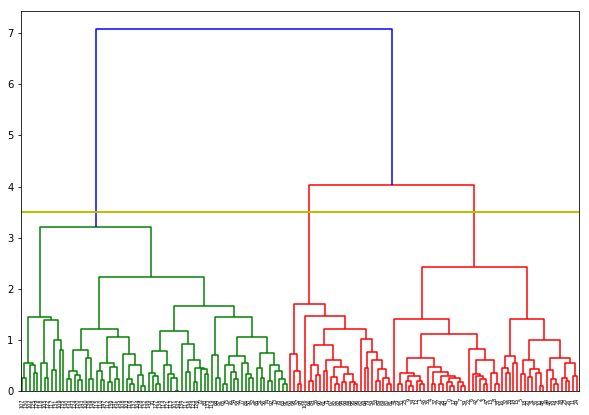

In [10]:
linked = linkage(df, method='complete')

plt.figure(figsize=(10, 7))  
plt.axhline(y=3.5, linewidth=2, color='y')

dendrogram(linked)

plt.show()


## Critério de ward

Separação por critério de ward. A linha amarela representa um exemplo de ponto de corte para estabelecer o número cluster a ser utilizado.

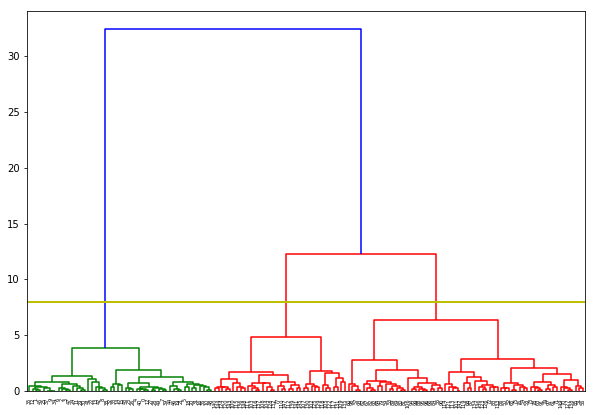

In [10]:

linked = linkage(df, method='ward')

plt.figure(figsize=(10, 7))  

plt.axhline(y=8, linewidth=2, color='y')


dendrogram(linked)

plt.show()



**3- Considerando o dataset abaixo, qual o número de clusters k sugerido? Utilize o algoritmo k-means para agrupar k clusters.**


Observando o dendograma obtido pelo critério de ward é possível estabelecer uma linha de corte quando as distâncias começam a crescer. Um ponto de corte a ser escolhido, por exemplo, é o ponto 20 (representado pela linha amarela), separando em três clusters.

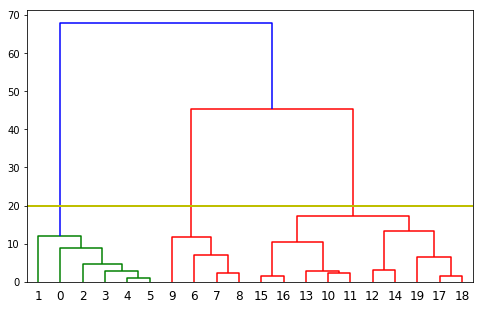

In [13]:

data = np.array([
    [18,11],
    [21,22],
    [22,15],
    [24,12],
    [26,13],
    [26,14],
    [27,33],
    [30,39],
    [31,37],
    [35,44],
    [39,27],
    [40,29],
    [41,20],
    [42,28],
    [44,21],
    [46,30],
    [47,31],
    [48,23],
    [49,24],
    [54,25],
])


linked_data = linkage(data, method='ward')

plt.figure(figsize=(8, 5))  
plt.axhline(y=20, linewidth=2, color='y')

dendrogram(linked_data)

plt.show()



# K-means

Será adotado o valor 3 para o número de clusters, observado pelo critério de Ward. Abaixo está a distribuição original dos dados.

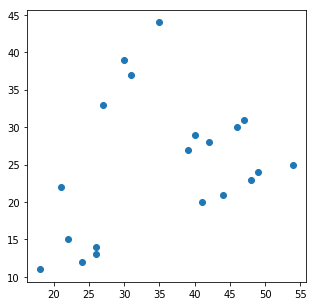

In [14]:
plt.figure(figsize=(5, 5))  
plt.scatter(data[:, 0], data[:, 1])

## Clusters

Abaixo é possível ver a separação de dados realizada pelo K-means com $k=3$. Cada cor do gráfico indica um cluster. É possível ver três clusters bem definidos pelo algoritmo.

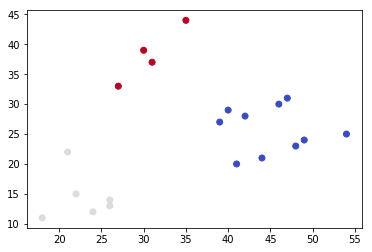

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data[:,0],
            data[:,1], 
            c=kmeans.labels_, 
            cmap='coolwarm')  
